In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [12]:
def visualize_bounding_boxes(image, bboxes):
    h, w = image.shape[:2]

    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

    for bbox in bboxes:
        class_id, x_center, y_center, box_w, box_h = bbox

        # Convert normalized to pixel coordinates
        x_center *= w
        y_center *= h
        box_w *= w
        box_h *= h

        # Convert to top-left coordinates
        x_min = x_center - box_w / 2
        y_min = y_center - box_h / 2

        rect = patches.Rectangle(
            (x_min, y_min),
            box_w,
            box_h,
            linewidth=1.5,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, str(class_id), color='red', fontsize=8, weight='bold')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
img_path = 'yolo_synthetic_lines/line_19.jpg'
bbox_path = 'yolo_synthetic_lines/line_19.txt'

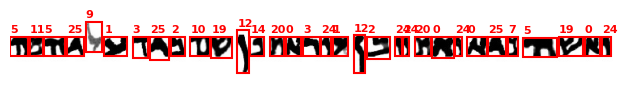

<Figure size 640x480 with 0 Axes>

In [14]:
image = cv2.imread(img_path)
if image is None:
    raise ValueError(f"Could not read image: {img_path}")
bboxes = []
with open(bbox_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        bboxes.append((class_id, x_center, y_center, width, height))

# Visualize
visualize_bounding_boxes(image, bboxes)
